In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse, spatial

%matplotlib inline



In [56]:
!pip install httpimport

In [61]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, confusion_matrix, f1_score, classification_report
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns




def plot_confusion_matrix(y_true, y_pred, classes=np.arange(0,7),
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues, saveloc=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Inputs:
    - y_true(numpy): array of ground truth
    - y_pred(nump): array of predictions
    - classes(numpy): array of possible classes
    - normalize(bool): normalize output
    - title(string): plot title
    - cmap(pyplot): color scheme
    - saveloc(string): location to save plot
    
    Output:
    - confusion matrix
    - pyplot axis
    
    
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print("Confusion Matrix: ")
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    if saveloc:
        plt.savefig(saveloc)
        
    
    print("Plotted confusion matrix")
    plt.show()
    
    return ax



def model_evaluation(y_true, y_pred, average='weighted',classes=np.arange(0,7),
                     normalize=False,
                     title=None,
                     cmap=plt.cm.Blues, saveloc=None):
    
    
    """
    Prints out accuracy
    Prints out classification report
    Prints out confusion matrix
    Plots confusion matrix
    
    Inputs:
        - y_true(numpy): array of ground truth
        - y_pred(nump): array of predictions
        - classes(numpy): array of possible classes
        - normalize(bool): normalize output
        - title(string): plot title
        - cmap(pyplot): color scheme
        - saveloc(string): location to save plot
    Output:
        - confusion matrix
        - pyplot axis
    
    
    """
    
    #print accuracy
    accuracy = np.mean(y_true == y_pred)
    print("Accuracy = {:.3f}\n".format(accuracy))
    
    #get classification report
    print("classification report:\n")
    print(classification_report(y_true,y_pred, labels=classes))
    print("\n")
    #generate confusion matrix
    return plot_confusion_matrix(y_true, y_pred, classes,
                                 normalize,
                                 title, cmap, saveloc)
    
    
    
    
def make_svd_heatmap_plot(k, lr, actual_v_pred, save=True):
    sns.heatmap(actual_v_pred, vmin=0, vmax=10);
    plt.xticks(np.arange(10), np.arange(1,11));
    plt.yticks(np.arange(10), np.arange(1,11));
    plt.xlabel("Predicted Values");
    plt.ylabel("Actual Values");
    
    plt.title("Actual vs. Predicted Values, k={} lr={}".format(k, lr))
    save_path = "plots/svd_heatmap_"+"lr"+str(lr)+"_k"+str(k)+".png"
    
    if save:
        plt.savefig(save_path)
    plt.show()



def make_svd_hist_plot(k, lr, acts, preds, save=True):
    
    plt.figure(figsize=(8,8))
    plt.hist(acts, density=True, alpha=.5, label='actual');
    plt.hist(preds, density=True, alpha=.5, label='predicted');
    plt.legend(loc=2, prop={'size': 15});
    plt.xlabel('Times Seen')
    
    plt.title('Predicted vs. Actual, k={}, lr={}'.format(k, lr))
    save_path = "plots/svd_hist_"+"lr"+str(lr)+"_k"+str(k)+".png"
    if save:
        plt.savefig(save_path)
    plt.show()
    
    

In [4]:
transcript = pd.read_csv("https://raw.githubusercontent.com/NadimKawwa/starbucks/master/data/full_transcript.csv", index_col=0)
transcript['offer_id'] = transcript['offer_id'].astype(int)
transcript.head(10)

,person,offer_id,offer received,offer viewed,offer completed,transaction,reward,amount,difficulty,email,mobile,social,web,bogo,discount,informational
0,0,4,1,1,1,3,3.0,7.54,7,1,1,1,1,0,1,0
1,0,7,2,2,1,2,2.0,2.63,10,2,2,2,2,0,1,0
2,0,8,1,1,0,0,0.0,0.00,10,1,1,0,1,0,1,0
3,0,9,1,1,0,1,0.0,0.35,20,1,0,0,1,0,1,0
4,1,0,1,0,0,0,0.0,0.00,0,1,1,0,1,0,0,1
5,1,2,1,0,1,0,5.0,0.00,5,1,1,0,1,1,0,0
6,2,1,1,1,0,0,0.0,0.00,0,1,1,1,0,0,0,1
7,2,2,1,1,0,0,0.0,0.00,5,1,1,0,1,1,0,0
8,3,1,1,1,0,2,0.0,49.39,0,1,1,1,0,0,0,1
9,3,2,1,1,1,1,5.0,19.89,5,1,1,0,1,1,0,0


In [5]:
user_df = pd.read_csv("https://raw.githubusercontent.com/NadimKawwa/starbucks/master/data/user_df_median.csv", index_col=1)
user_df = user_df.drop(columns=['Unnamed: 0'])

user_df.head()

,offer received,offer viewed,offer completed,transaction,reward_infl,amount_infl,email,mobile,social,web,...,avg_difficulty,time_to_open,time_to_complete,total_amount,amount_pct,age,gender,income,seen_ratio,completed_ratio
person,,,,,,,,,,,,,,,,,,,,,
0.0,5.0,5.0,2.0,6.0,5.0,10.52,5.0,4.0,3.0,5.0,...,12.0,0.083929,0.285714,20.40,0.515686,55.0,2.0,64000.0,1.0,0.40
1.0,2.0,0.0,1.0,0.0,5.0,0.00,2.0,2.0,0.0,2.0,...,2.0,1.000000,1.000000,77.01,0.000000,55.0,0.0,112000.0,0.0,0.50
2.0,2.0,2.0,0.0,0.0,0.0,0.00,2.0,2.0,1.0,1.0,...,2.0,0.000000,1.000000,14.30,0.000000,55.0,2.0,64000.0,1.0,0.00
3.0,4.0,4.0,3.0,3.0,20.0,69.28,4.0,4.0,3.0,2.0,...,5.0,0.234127,0.785714,159.27,0.434985,75.0,0.0,100000.0,1.0,0.75
4.0,5.0,3.0,0.0,1.0,0.0,1.09,5.0,2.0,1.0,4.0,...,7.0,0.012500,1.000000,4.65,0.234409,55.0,2.0,64000.0,0.6,0.00


In [6]:
user_df_scaled = pd.read_csv("https://raw.githubusercontent.com/NadimKawwa/starbucks/master/data/user_scaled.csv")

In [7]:
user_df.columns

Index(['offer received', 'offer viewed', 'offer completed', 'transaction',
       'reward_infl', 'amount_infl', 'email', 'mobile', 'social', 'web',
       'bogo', 'discount', 'informational', 'avg_difficulty', 'time_to_open',
       'time_to_complete', 'total_amount', 'amount_pct', 'age', 'gender',
       'income', 'seen_ratio', 'completed_ratio'],
      dtype='object')

In [8]:
transcript_offerid_sum = transcript.groupby(by='offer_id', as_index=True).sum()
transcript_offerid_sum = transcript_offerid_sum[['offer received','offer viewed', 'amount']]
transcript_offerid_sum['view_ratio'] = transcript_offerid_sum['offer viewed'] / transcript_offerid_sum['offer received']
transcript_offerid_sum['amount_per_view'] = transcript_offerid_sum['amount'] / transcript_offerid_sum['offer viewed']

transcript_offerid_sum

,offer received,offer viewed,amount,view_ratio,amount_per_view
offer_id,,,,,
0,7617,4144,39591.26,0.544046,9.553875
1,7618,6687,54291.40,0.877789,8.118947
2,7677,4171,26874.43,0.543311,6.443162
3,7571,7264,55226.14,0.959451,7.602718
4,7646,7337,54806.01,0.959587,7.469812
5,7658,6716,58728.75,0.876991,8.744602
6,7593,7298,58246.78,0.961148,7.981198
7,7597,7327,63546.65,0.964460,8.672943
8,7632,4118,31817.55,0.539570,7.726457


In [9]:
def most_viewed_offer (transcript_offerid_sum, top_k=5):
    """
    Returns the top k most popular offer ids
    Inputs:
    -transcript_offerid_sum(pandas): dataframe with offer id as index and statistics as columns
    -topk(int): number of predictions
    """
    
    #get an upper bound estiamte
    top_k_max = transcript_offerid_sum.shape[0]
    
    #replace upper bound
    if top_k > top_k_max:
        print("can't return more items than unique offer id")
        print("function will return  the maximum possible: {}".format(top_k_max))
        top_k = top_k_max
    
    #sort first by view ratio, then by money made per view
    sorted_transcript = transcript_offerid_sum.sort_values(by=['view_ratio', 'amount_per_view'], ascending=False)
    
    top_offers = sorted_transcript.index.tolist()[:top_k]
    
    return top_offers

In [10]:
#Sample output
most_viewed_offer(transcript_offerid_sum, top_k=3)

[7, 6, 4]

In [11]:
#Sample edge case
most_viewed_offer(transcript_offerid_sum, top_k=300)

can't return more items than unique offer id
function will return  the maximum possible: 10


[7, 6, 4, 3, 1, 5, 0, 2, 8, 9]

In [12]:
def most_profit_offer (transcript_offerid_sum, top_k=5):
    """
    Returns the top k most profitable offer ids
    Inputs:
    -transcript_offerid_sum(pandas): dataframe with offer id & view ratio
    -topk(int): number of predictions
    """
    
    top_k_max = transcript_offerid_sum.shape[0]
    
    if top_k > top_k_max:
        print("can't return more items than unique offer id")
        print("function will return  the maximum possible: {}".format(top_k_max))
        top_k = top_k_max
        
    sorted_transcript = transcript_offerid_sum.sort_values(by=['amount_per_view', 'view_ratio'], ascending=False)
    
    top_offers = sorted_transcript.index.tolist()[:top_k]
    
    
    return top_offers

In [13]:
#sample output
most_profit_offer (transcript_offerid_sum, top_k=3)

[9, 0, 5]

In [14]:
#edge case 
most_profit_offer (transcript_offerid_sum, top_k=3000)

can't return more items than unique offer id
function will return  the maximum possible: 10


[9, 0, 5, 7, 1, 6, 8, 3, 4, 2]

In [15]:
user_views = transcript[['person', 'offer_id', 'offer viewed']]
#shuffle the entries
user_views = user_views.sample(frac=1)

user_views.head()

,person,offer_id,offer viewed
54323,14590,8,1
29956,8033,3,1
59624,16016,6,2
53381,14324,5,1
27893,7487,2,1


In [16]:
# Create user-by-item matrix
user_by_item = user_views.groupby(['person', 'offer_id'])['offer viewed'].max().unstack()


#drop rows that are entirely nan
user_by_item = user_by_item.dropna(how='all')

user_by_item.head()

offer_id,0,1,2,3,4,5,6,7,8,9
person,,,,,,,,,,
0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,1.0,1.0
1,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN
4,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [17]:
def get_offers_seen(user_by_item, user):
    """
    Get the offers seen by a user, sort by most viewed first
    Inputs:
    - user_by_user(pandas): user item matrix with user as index and offer id as column
    - user(int): the user id
    
    Output:
    - offers_seen(list): an array of offers seen
    """
    
    #get seen offers
    user_offers_seen = user_by_item.loc[user][user_by_item.loc[user].isna()==False]
    
    #sort by descending order
    user_offers_seen = user_offers_seen.sort_values(ascending=False)
    
    #get values
    user_offers_seen = user_offers_seen.index.values.tolist()
    
    return user_offers_seen

In [18]:
def create_user_offer_dict(user_by_item):
    """
    Input:
    - user_by_user(pandas): user item matrix with user as index and offer id as column
    Output:
    offers_seen(dict): user ID as key and offers viewed as values
    """
    
    #dict key is user and values are offers seen
    offers_seen = dict()
    
    #for each user get the offers seen
    for user in user_by_item.index:
        offers_seen[user] = get_offers_seen(user_by_item, user)
        
    return offers_seen

In [19]:
#get a dict of seen offers
offers_seen_dict = create_user_offer_dict(user_by_item)


In [20]:
#get sample output
offers_seen_dict[0]

[7, 9, 8, 4]

In [21]:
def compute_similarity_euclid(user1_id, user2_id,user_df=user_df):
    """
    Compute the euclidian distance between two users
    Inputs:
    - user1(int): fist user id
    - user2(int): second user id
    - user_df(pandas): features about users
    Output:
    - norm(numpy.float64): norm between two users
    """
    #get user rows
    user1 = user_df.loc[user1_id]
    user2 = user_df.loc[user2_id]
    
    #ge the difference
    diff = user1 - user2
    
    #drop nans
    diff= diff.dropna()
    
    #calculate the norm
    norm = np.linalg.norm(diff)
    
    return norm

In [22]:
#sample output
compute_similarity_euclid(5, 32)

84.93585510237546

In [23]:
def compute_similarity_corr(user1_id, user2_id, user_df=user_df, method='pearson'):
    """
    Compute the pearson correlation  between two users
    Inputs:
    - user1(int): fist user id
    - user2(int): second user id
    - user_df(pandas): features about users
    Output:
    - corr(numpy.float64): correlation
    """
    
    #make dataframe from user ids
    df_corr = user_df.loc[[user1_id, user2_id]]
    
    #get correlation and select term off the diagonal
    corr = df_corr.transpose().corr(method).iloc[0,1]
    
    return corr

In [24]:
compute_similarity_corr(42, 1)

0.999998235549934

In [25]:
compute_similarity_corr(42, 1, method='kendall')

0.45560568900151466

In [26]:
def compute_similarity_cosine(user1_id, user2_id,user_df=user_df):
    """
    Compute the cosine distance  between two users
    Inputs:
    - user1(int): fist user id
    - user2(int): second user id
    - user_df(pandas): user feature dataframe
    Output:
    - cos_dist(numpy.float64): cosine distance
    """
    
    #get user rows
    user1 = user_df.loc[user1_id]
    user2 = user_df.loc[user2_id]
    
    cos_dist = 1 - spatial.distance.cosine(user1, user2)
    
    
    return cos_dist

In [27]:
#sample
compute_similarity_cosine(42, 77)

0.9999982548512846

In [28]:
def find_most_similar(user, user_df=user_df, method='pearson', corr='pearson'):
    """
    Find the most similar users to a given user id
    Inputs:
    - user(int): user idx
    - user_df(pandas): features about users
    - method(str): method to get similarity (pearson, euclid)
    Output:
    - most_sim_users(np.array): sorted list of most similar users
    """
    
    #store similarities here
    sim_list= []

    
    if method =='pearson':
        for idx in user_df.index:
            sim = compute_similarity_corr(user, idx, user_df, corr)
            sim_list.append(sim)
        #convert to numpy array
        sim_list= np.array(sim_list)
        
        #get ids sorted in DESCENDING order for PEARSON
        most_sim_users = sim_list.argsort()[::-1]
        #drop the first user
        most_sim_users = most_sim_users[1:]
        
    if method =='euclid':
        for idx in user_df.index:
            sim = compute_similarity_euclid(user, idx)
            sim_list.append(sim)
        #convert to numpy array
        sim_list= np.array(sim_list)
        
        #get ids sorted in ASCENDING order for EUCLIDIAN
        most_sim_users = sim_list.argsort()
        #drop the first user
        most_sim_users = most_sim_users[1:]
        
        
        if method =='cosine':
            for idx in user_df.index:
                sim = compute_similarity_cosine(user, idx)
                sim_list.append(sim)
            #convert to numpy array
            sim_list= np.array(sim_list)

            #get ids sorted in DESCENDING order for COSINE
            most_sim_users = sim_list.argsort()[::-1]
            #drop the first user
            most_sim_users = most_sim_users[1:]

        
    return most_sim_users

In [29]:
def make_collab_recomm(user, offers_seen_dict = offers_seen_dict,
                       top_k = 2, user_by_item = user_by_item,
                       user_df = user_df, method='pearson', verbose=True):
    
    """
    Make offer recommendations for a user
    Inputs:
    - user(int): user idx
    - offers_seen_dict(dict): user idx as key and offers seen as values
    - top_k(int): number of recommendations to make
    - user_by_item(pandas): user item dataframe with users as rows, offers as columns, and times seen as values
    - user_df(pandas): features about users
    - method(str): method to get similarity (pearson, euclid)
    Output:
    - offers_to_user(list): array of offers for user
    
    """
    
    #find the most similar users
    sim_to_user = find_most_similar(user, user_df, method)
    
    #get offers seen
    idx_seen = offers_seen_dict[user]
    
    if verbose:
        print("Similarity measured by {}".format(method))
        print("Original user {} already saw: \t {}".format(user, idx_seen))
    
    #get number of offers already seen
    idx_seen_len = len(idx_seen)
    
    #get number of offers available
    len_available = user_by_item.shape[1]
    
    if top_k > (len_available - idx_seen_len):
        print("Top k of {} is bigger than possible, will return only {} offers".format(top_k, (len_available - idx_seen_len)))
        top_k = (len_available - idx_seen_len)
        
    #empty set to store unique offer ids
    proposed_offers = np.array([])
        
    for idx in sim_to_user:
        idx_sim_offer = offers_seen_dict[idx]
        
        new_offers = (np.setdiff1d(idx_sim_offer,idx_seen))
        
        if verbose:
            print("Similar user {} saw: \t {}".format(idx, idx_sim_offer))
            print("Unseen offers by original user: \t {}".format(new_offers))
        
        proposed_offers = np.unique(np.concatenate([new_offers, proposed_offers], axis=0))
        print("We propose so far: {}".format(proposed_offers))
            
        
        if len(proposed_offers)>top_k:
            break
    
    proposed_offers = proposed_offers[0:top_k]
    
    if verbose:
        print("\nFor user {} we suggest offers : \t {}".format(user, proposed_offers))
    
    return proposed_offers

In [30]:
#get sample output with pearson
make_collab_recomm(5, top_k=3, verbose=True)

Similarity measured by pearson
Original user 5 already saw: 	 [8, 7, 2, 0]
Similar user 6534 saw: 	 [0, 8, 6, 3]
Unseen offers by original user: 	 [3 6]
We propose so far: [3. 6.]
Similar user 1307 saw: 	 [3, 7, 6, 2]
Unseen offers by original user: 	 [3 6]
We propose so far: [3. 6.]
Similar user 98 saw: 	 [5, 9, 1]
Unseen offers by original user: 	 [1 5 9]
We propose so far: [1. 3. 5. 6. 9.]

For user 5 we suggest offers : 	 [1. 3. 5.]


array([1., 3., 5.])

In [31]:
#sample output for euclidian distance
make_collab_recomm(5, top_k=3, method='euclid',verbose=True)

Similarity measured by euclid
Original user 5 already saw: 	 [8, 7, 2, 0]
Similar user 440 saw: 	 [6, 3, 2]
Unseen offers by original user: 	 [3 6]
We propose so far: [3. 6.]
Similar user 12411 saw: 	 [6, 1, 8]
Unseen offers by original user: 	 [1 6]
We propose so far: [1. 3. 6.]
Similar user 10854 saw: 	 [7, 6, 4, 2]
Unseen offers by original user: 	 [4 6]
We propose so far: [1. 3. 4. 6.]

For user 5 we suggest offers : 	 [1. 3. 4.]


array([1., 3., 4.])

In [32]:
#convert user item matrix to numpy
ratings_mat = np.array(user_by_item)

In [33]:
def FunkSVD(ratings_mat, latent_features=4, learning_rate=0.0001, iters=100, print_every=25):
    '''
    This function performs matrix factorization using a basic form of FunkSVD with no regularization
    
    INPUT:
    - user_by_item(df): user item dataframe with users as rows, offers as columns, and times seen as values
    - latent_features: (int) the number of latent features used
    - learning_rate: (float) the learning rate 
    - iters: (int) the number of iterations
    
    OUTPUT:
    - user_mat(numpy.array): a user by latent feature matrix
    - item_mat(numpy.array) a latent feature by item matrix
    '''
    
    
    # Set up useful values to be used through the rest of the function
    n_users = ratings_mat.shape[0]
    n_items = ratings_mat.shape[1]
    num_ratings = np.count_nonzero(~np.isnan(ratings_mat))
    
    # initialize the user and item matrices with random values
    user_mat = np.random.rand(n_users, latent_features)
    item_mat = np.random.rand(latent_features, n_items)
    
    # initialize sse at 0 for first iteration
    sse_accum = 0
    
    # header for running results
    print("Optimizaiton Statistics")
    print("Iterations | Mean Squared Error ")
    
    # for each iteration
    for iteration in range(iters):

        # update our sse
        old_sse = sse_accum
        sse_accum = 0
        
        # For each user-item pair
        for i in range(n_users):
            for j in range(n_items):
                
                # if the rating exists
                if ratings_mat[i, j] > 0:
                    
                    # compute the error as the actual minus the dot product of the user and item latent features
                    diff = ratings_mat[i, j] - np.dot(user_mat[i, :], item_mat[:, j])
                    
                    # Keep track of the sum of squared errors for the matrix
                    sse_accum += diff**2
                    
                    # update the values in each matrix in the direction of the gradient
                    for k in range(latent_features):
                        user_mat[i, k] += learning_rate * (2*diff*item_mat[k, j])
                        item_mat[k, j] += learning_rate * (2*diff*user_mat[i, k])

        # print results for iteration
        if iteration % print_every ==0:
            print("%d \t\t %f" % (iteration, sse_accum / num_ratings))
        
    return user_mat, item_mat

In [34]:
def create_train_test(reviews, training_size, testing_size):
    '''    
    INPUT:
    - reviews(pandas df): dataframe to split into train and test
    - order_by(string): column name to sort by
    - training_size(int): number of rows in training set
    - testing_size(int): number of columns in the test set
    
    OUTPUT:
    - training_df(pandas df): dataframe of the training set
    - validation_df(pandas df): dataframe of the test set
    '''
    reviews_new = reviews.copy()
    training_df = reviews_new.head(training_size)
    validation_df = reviews_new.iloc[training_size:training_size+testing_size]
    
    return training_df, validation_df


In [35]:
#make train and valid sets from df below
user_views.head()

,person,offer_id,offer viewed
54323,14590,8,1
29956,8033,3,1
59624,16016,6,2
53381,14324,5,1
27893,7487,2,1


In [36]:
user_views.shape

(63288, 3)

In [37]:
train_df, val_df = create_train_test(user_views, 55000, 5000)

In [38]:
train_df.head()

,person,offer_id,offer viewed
54323,14590,8,1
29956,8033,3,1
59624,16016,6,2
53381,14324,5,1
27893,7487,2,1


In [39]:
val_df.head()

,person,offer_id,offer viewed
54122,14535,5,1
4360,1180,5,1
47955,12861,7,2
16431,4410,1,1
3781,1019,7,1


In [40]:
# Create user-by-item matrix 
train_user_item = train_df[['person', 'offer_id', 'offer viewed']]
train_data_df = train_user_item.groupby(['person', 'offer_id'])['offer viewed'].max().unstack()
train_data_np = np.array(train_data_df)

train_data_df.head()

offer_id,0,1,2,3,4,5,6,7,8,9
person,,,,,,,,,,
0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,1.0
1,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
4,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [41]:
# Fit FunkSVD with the specified hyper parameters to the training data
k = 25
lr = 0.005


user_mat, item_mat = FunkSVD(train_data_np, latent_features=k, learning_rate=lr, iters=150)

Optimizaiton Statistics
Iterations | Mean Squared Error 
0 		 0.221776
25 		 0.139098
50 		 0.121493
75 		 0.101162
100 		 0.075318
125 		 0.047829


In [42]:
def predict_rating(user_matrix, item_matrix, user_id, item_id, train_data_df = train_data_df):
    '''
    INPUT:
    - user_matrix(numpy.array): user by latent factor matrix
    - item_matrix(numpy.array): latent factor by item matrix
    - user_id(int): the user id
    - item(int): the item id according the  df
    - train_data_df(pandas):
    
    OUTPUT:
    - pred(int): the predicted rating for user_id-item_id according to FunkSVD
    '''
    # Use the training data to create a series of users and items that matches the ordering in training data
    user_ids_series = np.array(train_data_df.index)
    item_ids_series = np.array(train_data_df.columns)
    
    # User row and items Column
    user_row = np.where(user_ids_series == user_id)[0][0]
    item_col = np.where(item_ids_series == item_id)[0][0]
    
    # Take dot product of that row and column in U and V to make prediction
    pred = np.dot(user_matrix[user_row, :], ite#sample output
predict_rating(user_mat, item_mat, 2, 2)m_matrix[:, item_col])
    
    #round because we are dealing with integers
    
    return pred

In [43]:
#sample output
predict_rating(user_mat, item_mat, 2, 2)

1.0282552235339641

In [44]:
#more outputs
predict_rating(user_mat, item_mat, 2000, 9)

1.7171291924278576

In [45]:
def validation_comparison(val_df, user_mat=user_mat, item_mat=item_mat):
    '''
    INPUT:
    - val_df(pandas): the validation dataset created in the third cell above
    - user_mat(numpy.array): U matrix in FunkSVD
    - item_mat(numpy.array): V matrix in FunkSVD
        
    OUTPUT:
    - rmse(float) RMSE of how far off each value is from it's predicted value
    - perc_rated(float) percent of predictions out of all possible that could be rated
    - actual_v_pred(numpy.array) a 10 x 10 grid with counts for actual vs predicted values
    '''
        
    val_users = np.array(val_df['person'])
    val_items = np.array(val_df['offer_id'])
    val_ratings = np.array(val_df['offer viewed'])
    
    sse = 0
    num_rated = 0
    preds, acts = [], []
    actual_v_pred = np.zeros((10,10))
    for idx in range(len(val_users)):
        try:
            pred = predict_rating(user_mat, item_mat, val_users[idx], val_items[idx])
            sse += (val_ratings[idx] - pred)**2
            num_rated+=1
            preds.append(pred)
            acts.append(val_ratings[idx])
            actual_v_pred[11-int(val_ratings[idx]-1), int(round(pred)-1)]+=1
        
        except:
            continue
    
    rmse = np.sqrt(sse/num_rated)
    perc_rated = num_rated/len(val_users)
    return rmse, perc_rated, actual_v_pred, preds, acts

In [46]:
rmse, perc_rated, actual_v_pred, preds, acts = validation_comparison(val_df)

FileNotFoundError: [Errno 2] No such file or directory: 'plots/svd_hist_lr0.005_k25.png'

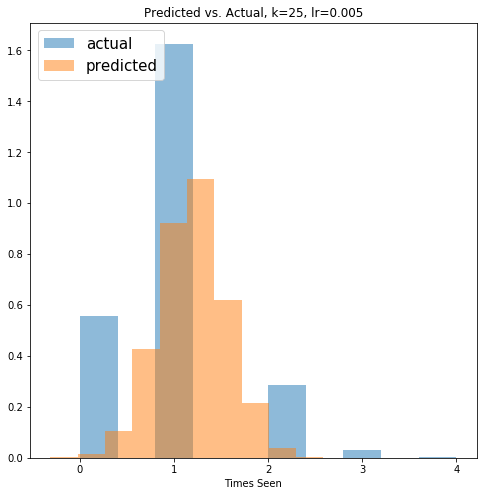

In [62]:
make_svd_hist_plot(k, lr, acts, preds)